In [1]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [2]:
df =  pd.read_csv('data/Pokemon.csv') 

In [3]:
df.shape

(721, 23)

In [4]:
df.shape

(721, 23)

In [5]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<Figure size 720x576 with 0 Axes>

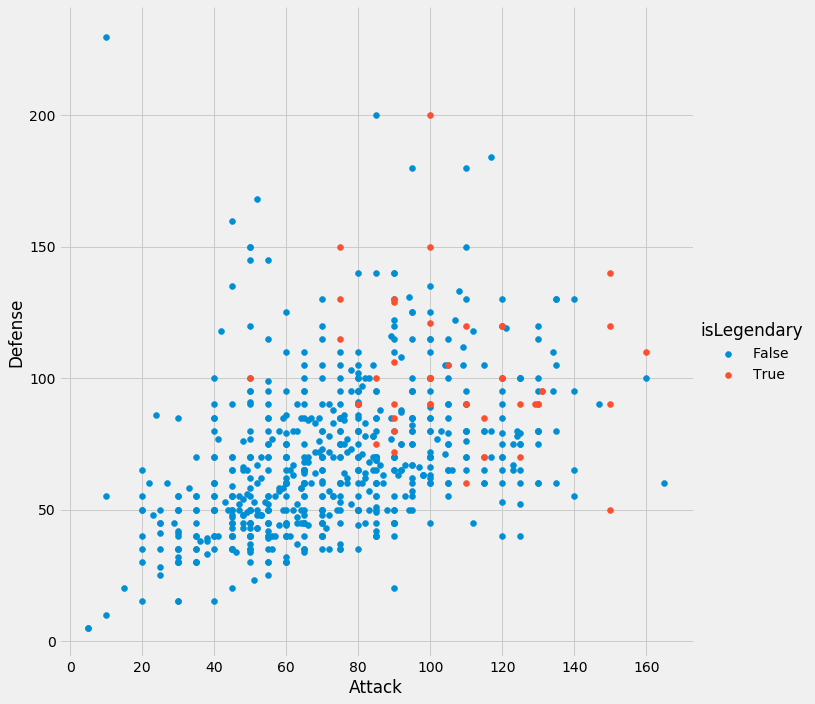

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df, hue="isLegendary", size = 10).map(plt.scatter, "Attack", "Defense").add_legend()

In [7]:
df = df.set_index('Name')
df2 = df[(df['Type_1']=='Water')]
df2 = df2.drop('Generation', axis=1)
print("Water Pokemon with Max HP:",df2['HP'].argmax())
print("Water Pokemon with Max SPEED:", df2['Speed'].argmax())
print("Water Pokemon with Max Sp.Attack:", df2['Sp_Atk'].argmax())
print("Water Pokemon with Max Sp.Defense:", df2['Sp_Def'].argmax())
print("Water Pokemon with Max Attack:", df2['Attack'].argmax())
print("Water Pokemon with Max Defense:", df2['Defense'].argmax())

Water Pokemon with Max HP: Wailord
Water Pokemon with Max SPEED: Greninja
Water Pokemon with Max Sp.Attack: Kyogre
Water Pokemon with Max Sp.Defense: Mantine
Water Pokemon with Max Attack: Kingler
Water Pokemon with Max Defense: Cloyster


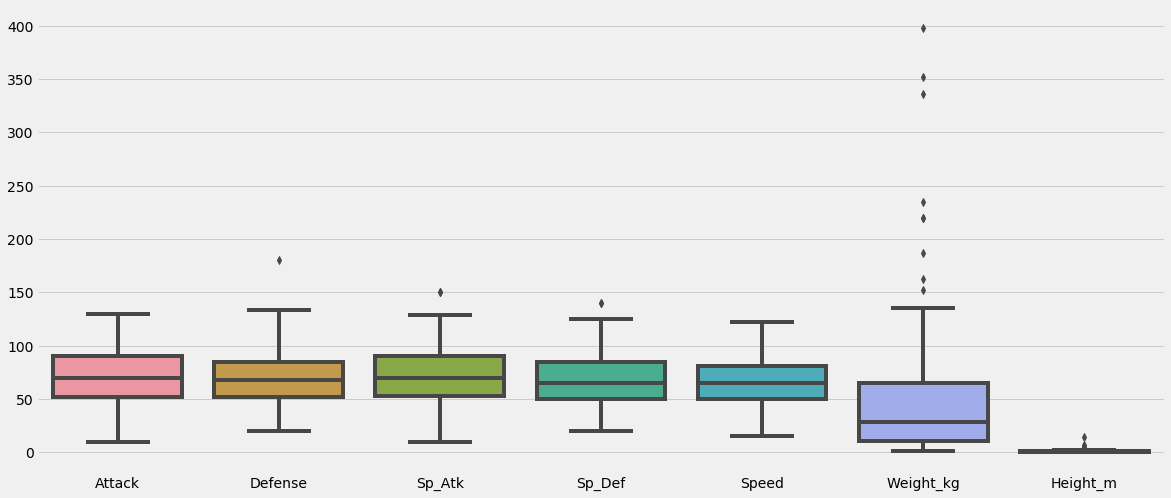

In [8]:
plt.figure(figsize=(18,8))

df3 = df[(df['Type_1']=='Water')]#selecting water type 
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = df3)

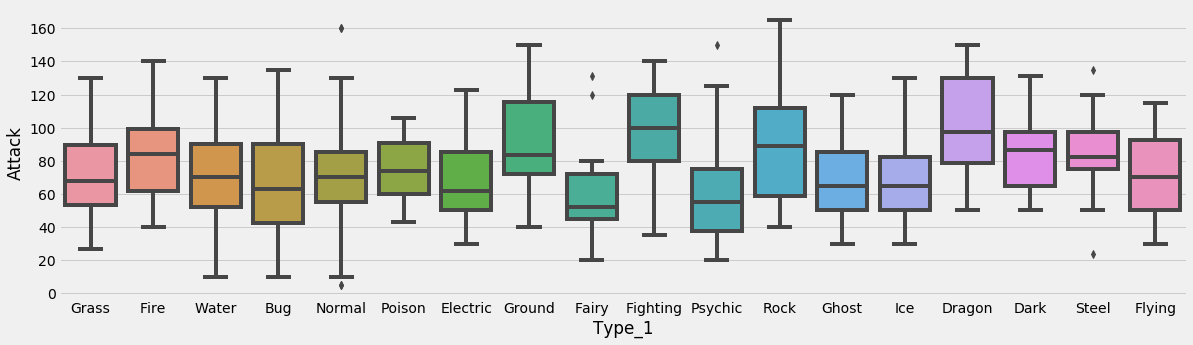

In [9]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Attack", data=df)

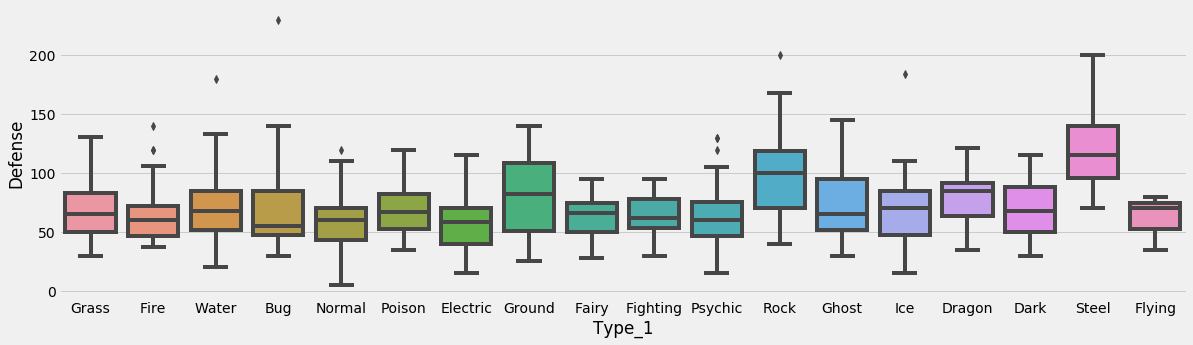

In [10]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Defense", data=df)

In [11]:
df.pivot_table(values='isLegendary',index=['Generation'],aggfunc=np.mean).reset_index()

,Generation,isLegendary
0,1,0.026490
1,2,0.050000
2,3,0.074074
3,4,0.102804
4,5,0.064103
5,6,0.083333


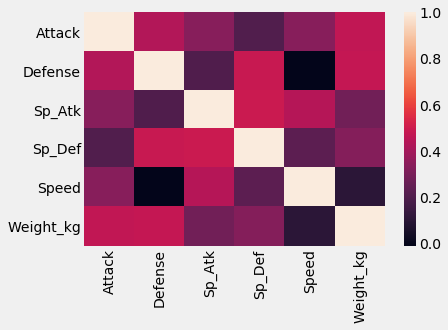

In [12]:
# plt.subplots(figsize = (18,5))
sns.heatmap(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg"]].corr())

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isLegendary"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isLegendary"])
print(accuracy)

0.9070735090152566


In [14]:
logistic_model.coef_

array([[ 0.00829422,  0.01804823,  0.03239594,  0.02280706,  0.02671366,
         0.00715197, -0.25145638]])

In [15]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
df = df.reset_index()
selection = df[["Name","isLegendary","pred", "prob"]]
selection[selection["isLegendary"] == True].head()

,Name,isLegendary,pred,prob
143,Articuno,True,True,0.691664
144,Zapdos,True,True,0.760990
145,Moltres,True,True,0.710940
149,Mewtwo,True,True,0.972033
242,Raikou,True,True,0.886942


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isLegendary"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

In [17]:
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)


In [18]:
train_accuracy

0.8908730158730159

In [19]:
test_accuracy

0.9262672811059908

In [20]:
data = df.copy()
def updateTypeColumn(dataframe, columnName, columnValue):
    for index, row in dataframe.iterrows():
        if row.Type_1 == columnValue:
            dataframe.loc[index, columnName] = 1
        else:
            dataframe.loc[index, columnName] = 0
            
updateTypeColumn(data, 'Type_1', 'Water')
data['is_water'] = data['Type_1'].apply(int) # Converts column to int

In [21]:
X.head()

,Attack,Defense,Sp_Atk,Sp_Def,Speed,Weight_kg,Height_m
Name,,,,,,,
Bulbasaur,49,49,65,65,45,6.9,0.71
Ivysaur,62,63,80,80,60,13.0,0.99
Venusaur,82,83,100,100,80,100.0,2.01
Charmander,52,43,60,50,65,8.5,0.61
Charmeleon,64,58,80,65,80,19.0,1.09


In [22]:
data.head()

,Name,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,pred,prob,is_water
0,Bulbasaur,1,0,Poison,318,45,49,49,65,65,...,Monster,Grass,False,0.71,6.9,45,quadruped,False,0.019495,0
1,Ivysaur,2,0,Poison,405,60,62,63,80,80,...,Monster,Grass,False,0.99,13.0,45,quadruped,False,0.086634,0
2,Venusaur,3,0,Poison,525,80,82,83,100,100,...,Monster,Grass,True,2.01,100.0,45,quadruped,True,0.543755,0
3,Charmander,4,0,NaN,309,39,52,43,60,50,...,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed,False,0.019179,0
4,Charmeleon,5,0,NaN,405,58,64,58,80,65,...,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed,False,0.098042,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   data["is_water"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [24]:
test_accuracy

0.8435643564356435

## Lab Activity 2: 

__Goal: Multinomial Classification__

1. Create __balanced__ train and test sets that respect the distribution of the __Type 1__ column.
2. Train a LogisticRegression classifier to distinguish multiple class types.
3. Identify the Type_1 class that has the lowest performance.
    * Use the balanced_accuracy function to get a reliable performance metric.
    * Bonus: Figure out why the classifier is having trouble with this class/classes. 
4. Graduate students: Discuss the mechanism of using Logistic Regression for multinomial classification.

In [25]:
df['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)